### EDA and Modelling to understand what factors influence Player/Team Leaderboard
* This Prediction is just for self understanding of the factors which influence the target variables


## Step 1: Reading and Understanding the Data

Let us first import all libraries and dependencies

In [1]:
# import all libraries and dependencies for dataframe
from pyforest import *
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm 

In [2]:
# Local file path. Please change the file path accordingly

df_teams_s7 = pd.read_csv("C:\\Users\\I330405\\Documents\\HACKATHON\\TeamStastics_Season7.csv")

In [3]:
# Check the head of the dataset
df_teams_s7.head(12)

,Team,MATCHES PLAYED,WINS,DRAWS,LOSSES,AVG RANKING,TOTAL RAIDS,SUCCESSFUL RAIDS,UNSUCCESSFUL RAID,EMPTY RAIDS,SUCCESS RAID %,NO. OF SUPER RAIDS,RAID TOUCH POINTS,RAID BONUS POINTS,TOTAL RAID POINTS,TOTAL TACKLES,SUCCESSFUL TACKLES,UNSUCCESFUL TACKLES,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,ALL OUTS INFLICTED,TOTAL ALL OUT POINTS,TOTAL DEFENCE POINTS,ALL OUTS CONCEEDED,WINS%,DRAWS%,LOSSES%,AVG SUCCESSFUL TACKLES,AVG SUCCESSFUL RAIDS,AVG ALL OUTS INFLICTED,AVG ALL OUTS CONCEEDED,SuperPerformance
0,Bengal Warriors_SEASON 7,20,13,3,4,10.0000,823,340,159,324,0.5200,15,346,80,426,472,182,290,0.4100,12,34,68,192,17.0000,0.6500,0.1500,0.2000,9.1000,17.0000,1.7000,0.8500,44.0000
1,Patna Pirates_SEASON 7,19,6,1,12,40.0000,802,291,184,327,0.4600,13,298,70,368,448,168,280,0.4300,23,28,56,191,23.0000,0.3158,0.0526,0.6316,8.8421,15.3158,1.4737,1.2105,41.0000
2,Jaipur Pink Panthers_SEASON 7,20,8,2,10,35.0000,836,261,205,370,0.4000,7,246,91,337,483,189,294,0.4500,32,19,38,219,23.0000,0.4000,0.1000,0.5000,9.4500,13.0500,0.9500,1.1500,35.0000
3,Haryana Steelers_SEASON 7,19,12,1,6,21.0000,799,290,174,335,0.4700,14,306,71,377,475,181,294,0.4100,14,27,54,195,21.0000,0.6316,0.0526,0.3158,9.5263,15.2632,1.4211,1.1053,34.0000
4,Dabang Delhi_SEASON 7,20,15,2,3,5.0000,812,361,161,290,0.5400,8,324,113,437,480,181,299,0.3900,8,34,68,187,18.0000,0.7500,0.1000,0.1500,9.0500,18.0500,1.7000,0.9000,32.0000
5,Bengaluru Bulls_SEASON 7,19,10,1,8,20.0000,794,309,213,272,0.4900,8,295,98,393,438,168,270,0.4400,25,21,42,191,24.0000,0.5263,0.0526,0.4211,8.8421,16.2632,1.1053,1.2632,30.0000
6,U Mumba_SEASON 7,19,10,1,8,20.0000,771,258,175,338,0.4200,7,256,69,325,400,168,232,0.4600,18,26,52,183,21.0000,0.5263,0.0526,0.4211,8.8421,13.5789,1.3684,1.1053,30.0000
7,Gujrat Fortunegiants_SEASON 7,20,6,2,12,63.0000,821,265,220,336,0.3900,5,255,65,320,417,187,230,0.4900,17,21,42,203,22.0000,0.3000,0.1000,0.6000,9.3500,13.2500,1.0500,1.1000,21.0000
8,Telugu Titans_SEASON 7,18,5,3,10,55.0000,744,273,181,290,0.4500,9,238,94,332,413,162,251,0.4400,21,13,26,182,22.0000,0.2778,0.1667,0.5556,9.0000,15.1667,0.7222,1.2222,21.0000
9,UP Yoddha_SEASON 7,18,10,2,6,28.0000,757,223,178,356,0.3800,5,219,70,289,415,177,238,0.4600,16,21,42,192,22.0000,0.5556,0.1111,0.3333,9.8333,12.3889,1.1667,1.2222,20.0000


In [4]:
df_teams_s7.shape

(12, 32)

In [5]:
df_teams_s7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 32 columns):
Team                      12 non-null object
MATCHES PLAYED            12 non-null int64
WINS                      12 non-null int64
DRAWS                     12 non-null int64
LOSSES                    12 non-null int64
AVG RANKING               12 non-null float64
TOTAL RAIDS               12 non-null int64
SUCCESSFUL RAIDS          12 non-null int64
UNSUCCESSFUL RAID         12 non-null int64
EMPTY RAIDS               12 non-null int64
SUCCESS RAID %            12 non-null float64
NO. OF SUPER RAIDS        12 non-null int64
RAID TOUCH POINTS         12 non-null int64
RAID BONUS POINTS         12 non-null int64
TOTAL RAID POINTS         12 non-null int64
TOTAL TACKLES             12 non-null int64
SUCCESSFUL TACKLES        12 non-null int64
UNSUCCESFUL TACKLES       12 non-null int64
SUCCESSFUL TACKLE %       12 non-null float64
NO. OF SUPER TACKLES      12 non-null int64
ALL OUTS I

In [6]:
df_teams_s7.describe()

,MATCHES PLAYED,WINS,DRAWS,LOSSES,AVG RANKING,TOTAL RAIDS,SUCCESSFUL RAIDS,UNSUCCESSFUL RAID,EMPTY RAIDS,SUCCESS RAID %,NO. OF SUPER RAIDS,RAID TOUCH POINTS,RAID BONUS POINTS,TOTAL RAID POINTS,TOTAL TACKLES,SUCCESSFUL TACKLES,UNSUCCESFUL TACKLES,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,ALL OUTS INFLICTED,TOTAL ALL OUT POINTS,TOTAL DEFENCE POINTS,ALL OUTS CONCEEDED,WINS%,DRAWS%,LOSSES%,AVG SUCCESSFUL TACKLES,AVG SUCCESSFUL RAIDS,AVG ALL OUTS INFLICTED,AVG ALL OUTS CONCEEDED,SuperPerformance
count,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000
mean,19.2500,8.6667,2.0000,8.5833,35.0833,798.5000,285.0000,189.5000,324.0000,0.4467,8.4167,275.0000,82.3333,357.3333,451.7500,176.7500,275.0000,0.4317,18.6667,22.9167,45.8333,194.0833,22.9167,0.4493,0.1038,0.4469,9.1778,14.7882,1.1868,1.1921,27.0833
std,0.7538,3.6013,0.8528,3.2879,23.0709,29.0376,37.9377,21.6816,28.0195,0.0512,3.6794,38.3335,14.7730,44.7017,42.1623,14.5984,32.8993,0.0316,6.7734,7.0383,14.0766,17.8756,4.3580,0.1825,0.0444,0.1705,0.5981,1.7157,0.3476,0.2249,11.9046
min,18.0000,3.0000,1.0000,3.0000,5.0000,744.0000,223.0000,159.0000,272.0000,0.3800,4.0000,219.0000,65.0000,289.0000,400.0000,151.0000,230.0000,0.3800,8.0000,13.0000,26.0000,162.0000,17.0000,0.1579,0.0526,0.1500,7.9474,12.3889,0.6842,0.8500,1.0000
25%,19.0000,6.0000,1.0000,6.0000,20.0000,786.7500,260.5000,174.7500,314.7500,0.4075,5.7500,248.2500,70.0000,325.7500,416.5000,168.0000,247.7500,0.4100,13.7500,18.7500,37.5000,186.0000,21.0000,0.3000,0.0526,0.3289,8.8421,13.4967,0.9375,1.1039,20.7500
50%,19.0000,9.0000,2.0000,9.0000,31.5000,800.5000,281.5000,182.5000,327.0000,0.4400,7.5000,262.0000,78.5000,347.5000,443.0000,179.0000,280.0000,0.4350,17.5000,21.0000,42.0000,191.5000,22.0000,0.4632,0.1000,0.4605,9.0750,14.8333,1.1360,1.1803,30.0000
75%,20.0000,10.5000,3.0000,11.2500,43.7500,821.5000,295.5000,210.7500,336.5000,0.4750,10.0000,300.0000,91.7500,381.0000,476.2500,183.2500,294.0000,0.4525,23.5000,27.2500,54.5000,197.0000,23.2500,0.5746,0.1500,0.5667,9.4691,15.5526,1.4342,1.2325,34.2500
max,20.0000,15.0000,3.0000,13.0000,84.0000,836.0000,361.0000,220.0000,370.0000,0.5400,15.0000,346.0000,113.0000,437.0000,549.0000,207.0000,342.0000,0.4900,32.0000,34.0000,68.0000,232.0000,33.0000,0.7500,0.1667,0.6842,10.3500,18.0500,1.7000,1.6500,44.0000


## Step 2: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [7]:
# drop categorical variable
final = df_teams_s7.drop('Team',axis=1)

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(final, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that many columns have unscaled values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

We will use MinMax scaling.

In [8]:
scaler = MinMaxScaler()

In [9]:
final.head()

,MATCHES PLAYED,WINS,DRAWS,LOSSES,AVG RANKING,TOTAL RAIDS,SUCCESSFUL RAIDS,UNSUCCESSFUL RAID,EMPTY RAIDS,SUCCESS RAID %,NO. OF SUPER RAIDS,RAID TOUCH POINTS,RAID BONUS POINTS,TOTAL RAID POINTS,TOTAL TACKLES,SUCCESSFUL TACKLES,UNSUCCESFUL TACKLES,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,ALL OUTS INFLICTED,TOTAL ALL OUT POINTS,TOTAL DEFENCE POINTS,ALL OUTS CONCEEDED,WINS%,DRAWS%,LOSSES%,AVG SUCCESSFUL TACKLES,AVG SUCCESSFUL RAIDS,AVG ALL OUTS INFLICTED,AVG ALL OUTS CONCEEDED,SuperPerformance
0,20,13,3,4,10.0000,823,340,159,324,0.5200,15,346,80,426,472,182,290,0.4100,12,34,68,192,17.0000,0.6500,0.1500,0.2000,9.1000,17.0000,1.7000,0.8500,44.0000
1,19,6,1,12,40.0000,802,291,184,327,0.4600,13,298,70,368,448,168,280,0.4300,23,28,56,191,23.0000,0.3158,0.0526,0.6316,8.8421,15.3158,1.4737,1.2105,41.0000
2,20,8,2,10,35.0000,836,261,205,370,0.4000,7,246,91,337,483,189,294,0.4500,32,19,38,219,23.0000,0.4000,0.1000,0.5000,9.4500,13.0500,0.9500,1.1500,35.0000
3,19,12,1,6,21.0000,799,290,174,335,0.4700,14,306,71,377,475,181,294,0.4100,14,27,54,195,21.0000,0.6316,0.0526,0.3158,9.5263,15.2632,1.4211,1.1053,34.0000
4,20,15,2,3,5.0000,812,361,161,290,0.5400,8,324,113,437,480,181,299,0.3900,8,34,68,187,18.0000,0.7500,0.1000,0.1500,9.0500,18.0500,1.7000,0.9000,32.0000


In [10]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['MATCHES PLAYED','WINS','DRAWS','LOSSES','AVG RANKING','TOTAL RAIDS','SUCCESSFUL RAIDS','UNSUCCESSFUL RAID','EMPTY RAIDS',
'NO. OF SUPER RAIDS','RAID TOUCH POINTS','RAID BONUS POINTS','TOTAL RAID POINTS','TOTAL TACKLES','SUCCESSFUL TACKLES','UNSUCCESFUL TACKLES',
'NO. OF SUPER TACKLES','ALL OUTS INFLICTED','TOTAL ALL OUT POINTS','TOTAL DEFENCE POINTS']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\I330405\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [11]:
df_train.head(12)

,MATCHES PLAYED,WINS,DRAWS,LOSSES,AVG RANKING,TOTAL RAIDS,SUCCESSFUL RAIDS,UNSUCCESSFUL RAID,EMPTY RAIDS,SUCCESS RAID %,NO. OF SUPER RAIDS,RAID TOUCH POINTS,RAID BONUS POINTS,TOTAL RAID POINTS,TOTAL TACKLES,SUCCESSFUL TACKLES,UNSUCCESFUL TACKLES,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,ALL OUTS INFLICTED,TOTAL ALL OUT POINTS,TOTAL DEFENCE POINTS,ALL OUTS CONCEEDED,WINS%,DRAWS%,LOSSES%,AVG SUCCESSFUL TACKLES,AVG SUCCESSFUL RAIDS,AVG ALL OUTS INFLICTED,AVG ALL OUTS CONCEEDED,SuperPerformance
4,1.0000,1.0000,0.5000,0.0000,0.0000,0.7391,1.0000,0.0328,0.0000,0.5400,0.3636,0.7963,1.0000,1.0000,0.4926,0.5357,0.6161,0.3900,0.0000,1.0000,1.0000,0.3571,18.0000,0.7500,0.1000,0.1500,9.0500,18.0500,1.7000,0.9000,32.0000
2,1.0000,0.4167,0.5000,0.7000,0.3797,1.0000,0.0196,0.7541,1.0000,0.4000,0.2727,0.0741,0.5417,0.1453,0.5147,0.6786,0.5714,0.4500,1.0000,0.2857,0.2857,0.8143,23.0000,0.4000,0.1000,0.5000,9.4500,13.0500,0.9500,1.1500,35.0000
0,1.0000,0.8333,1.0000,0.1000,0.0633,0.8587,0.7941,0.0000,0.4250,0.5200,1.0000,1.0000,0.3125,0.9060,0.4338,0.5536,0.5357,0.4100,0.1667,1.0000,1.0000,0.4286,17.0000,0.6500,0.1500,0.2000,9.1000,17.0000,1.7000,0.8500,44.0000
10,1.0000,0.2500,1.0000,0.8000,0.4430,0.9457,0.3039,0.9016,0.4625,0.4300,0.1818,0.2778,0.5208,0.3248,1.0000,1.0000,1.0000,0.4200,0.7083,0.2381,0.2381,1.0000,33.0000,0.3000,0.1500,0.5500,10.3500,14.5000,0.9000,1.6500,16.0000
7,1.0000,0.2500,0.5000,0.9000,0.7342,0.8370,0.0588,1.0000,0.5750,0.3900,0.0909,0.1574,0.0000,0.0000,0.0294,0.6429,0.0000,0.4900,0.3750,0.3810,0.3810,0.5857,22.0000,0.3000,0.1000,0.6000,9.3500,13.2500,1.0500,1.1000,21.0000
3,0.5000,0.7500,0.0000,0.3000,0.2025,0.5978,0.3039,0.2459,0.5625,0.4700,0.9091,0.6296,0.1250,0.4872,0.4559,0.5357,0.5714,0.4100,0.2500,0.6667,0.6667,0.4714,21.0000,0.6316,0.0526,0.3158,9.5263,15.2632,1.4211,1.1053,34.0000
11,0.5000,0.0000,1.0000,1.0000,1.0000,0.5217,0.0000,0.8361,0.4125,0.4100,0.0000,0.1019,0.2500,0.0513,0.1324,0.0000,0.4464,0.3800,0.2083,0.0000,0.0000,0.0000,29.0000,0.1579,0.1579,0.6842,7.9474,13.6316,0.6842,1.5263,1.0000
8,0.0000,0.1667,1.0000,0.7000,0.6329,0.0000,0.1373,0.3607,0.0000,0.4500,0.4545,0.0000,0.6042,0.1026,0.0000,0.1964,0.1875,0.4400,0.5417,0.0000,0.0000,0.2857,22.0000,0.2778,0.1667,0.5556,9.0000,15.1667,0.7222,1.2222,21.0000


In [12]:
df_train.describe()

,MATCHES PLAYED,WINS,DRAWS,LOSSES,AVG RANKING,TOTAL RAIDS,SUCCESSFUL RAIDS,UNSUCCESSFUL RAID,EMPTY RAIDS,SUCCESS RAID %,NO. OF SUPER RAIDS,RAID TOUCH POINTS,RAID BONUS POINTS,TOTAL RAID POINTS,TOTAL TACKLES,SUCCESSFUL TACKLES,UNSUCCESFUL TACKLES,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,ALL OUTS INFLICTED,TOTAL ALL OUT POINTS,TOTAL DEFENCE POINTS,ALL OUTS CONCEEDED,WINS%,DRAWS%,LOSSES%,AVG SUCCESSFUL TACKLES,AVG SUCCESSFUL RAIDS,AVG ALL OUTS INFLICTED,AVG ALL OUTS CONCEEDED,SuperPerformance
count,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000
mean,0.7500,0.4583,0.6875,0.5625,0.4320,0.6875,0.3272,0.5164,0.4297,0.4513,0.4091,0.3796,0.4193,0.3771,0.3824,0.5179,0.4911,0.4238,0.4062,0.4464,0.4464,0.4929,23.1250,0.4334,0.1221,0.4444,9.2217,14.9889,1.1409,1.1880,25.5000
std,0.3780,0.3591,0.3720,0.3777,0.3448,0.3222,0.3745,0.4034,0.3240,0.0554,0.3669,0.3771,0.3160,0.3891,0.3279,0.3041,0.2988,0.0354,0.3271,0.4024,0.4024,0.3112,5.3835,0.2149,0.0398,0.1969,0.6710,1.7883,0.4124,0.2783,13.5119
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3900,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3800,0.0000,0.0000,0.0000,0.0000,17.0000,0.1579,0.0526,0.1500,7.9474,13.0500,0.6842,0.8500,1.0000
25%,0.5000,0.2292,0.5000,0.2500,0.1677,0.5788,0.0490,0.1926,0.3094,0.4075,0.1591,0.0949,0.2188,0.0897,0.1066,0.4509,0.3817,0.4050,0.1979,0.1786,0.1786,0.3393,20.2500,0.2944,0.1000,0.2868,9.0375,13.5362,0.8556,1.0500,19.7500
50%,1.0000,0.3333,0.7500,0.7000,0.4114,0.7880,0.2206,0.5574,0.4438,0.4400,0.3182,0.2176,0.4167,0.2350,0.4449,0.5446,0.5536,0.4150,0.3125,0.3333,0.3333,0.4500,22.0000,0.3500,0.1250,0.5250,9.2250,14.8333,1.0000,1.1276,26.5000
75%,1.0000,0.7708,1.0000,0.8250,0.6582,0.8804,0.4265,0.8525,0.5656,0.4825,0.5682,0.6713,0.5573,0.5919,0.4982,0.6518,0.5826,0.4425,0.5833,0.7500,0.7500,0.6429,24.5000,0.6362,0.1520,0.5667,9.4691,15.6974,1.4908,1.2982,34.2500
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5400,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4900,1.0000,1.0000,1.0000,1.0000,33.0000,0.7500,0.1667,0.6842,10.3500,18.0500,1.7000,1.6500,44.0000


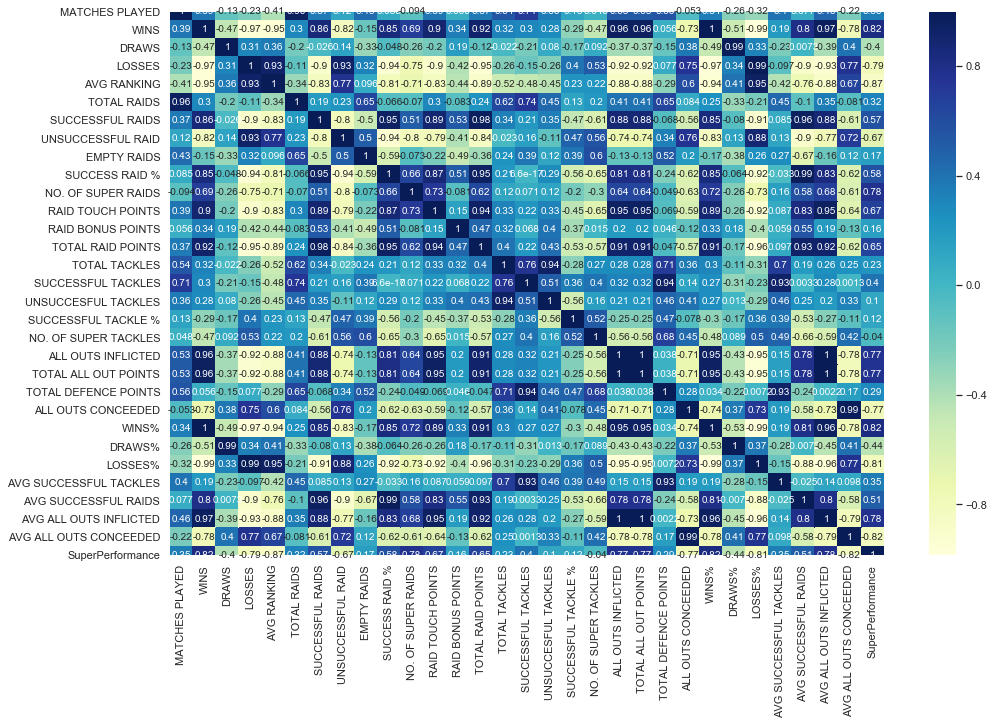

In [13]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

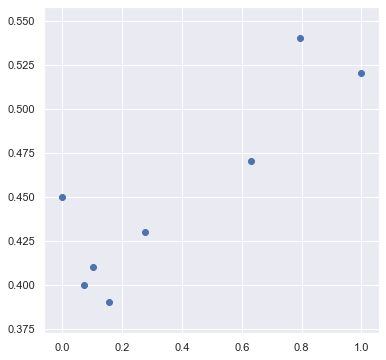

In [14]:
plt.figure(figsize=[6,6])
plt.scatter(df_train['RAID TOUCH POINTS'], df_train['SUCCESS RAID %'])
plt.show()

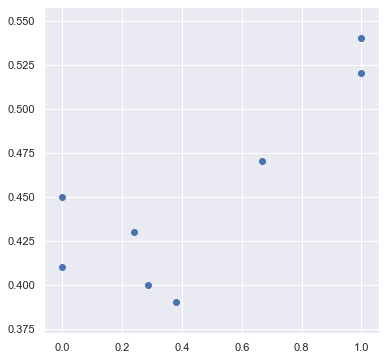

In [15]:
plt.figure(figsize=[6,6])
plt.scatter(df_train['TOTAL ALL OUT POINTS'], df_train['SUCCESS RAID %'])
plt.show()

### Dividing into X and Y sets for the model building

In [16]:
y_train = df_train.pop('SUCCESS RAID %')
X_train = df_train

## Step 3: Building a linear model

Fit a regression line through the training data using `statsmodels`.In `statsmodels`, we need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [17]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['RAID TOUCH POINTS']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [18]:
# Check the parameters obtained

lr.params

const               0.4026
RAID TOUCH POINTS   0.1283
dtype: float64

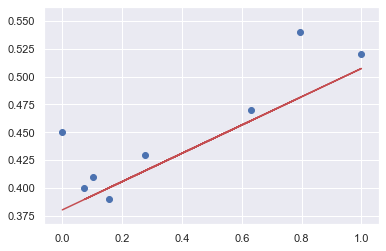

In [19]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.3803 + 0.1270*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [20]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:         SUCCESS RAID %   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     19.24
Date:                Wed, 02 Oct 2019   Prob (F-statistic):            0.00464
Time:                        01:07:46   Log-Likelihood:                 18.074
No. Observations:                   8   AIC:                            -32.15
Df Residuals:                       6   BIC:                            -31.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4026      0.01

C:\Users\I330405\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


We have improved the adjusted R-squared again. Now let's add all the feature variables.

### Adding all the variables to the model

In [21]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [22]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 4)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [23]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MATCHES PLAYED', False, 12),
 ('WINS', True, 1),
 ('DRAWS', False, 25),
 ('LOSSES', True, 1),
 ('AVG RANKING', False, 8),
 ('TOTAL RAIDS', False, 21),
 ('SUCCESSFUL RAIDS', False, 11),
 ('UNSUCCESSFUL RAID', True, 1),
 ('EMPTY RAIDS', False, 22),
 ('NO. OF SUPER RAIDS', False, 4),
 ('RAID TOUCH POINTS', False, 9),
 ('RAID BONUS POINTS', False, 13),
 ('TOTAL RAID POINTS', True, 1),
 ('TOTAL TACKLES', False, 6),
 ('SUCCESSFUL TACKLES', False, 7),
 ('UNSUCCESFUL TACKLES', False, 3),
 ('SUCCESSFUL TACKLE %', False, 20),
 ('NO. OF SUPER TACKLES', False, 17),
 ('ALL OUTS INFLICTED', False, 15),
 ('TOTAL ALL OUT POINTS', False, 19),
 ('TOTAL DEFENCE POINTS', False, 16),
 ('ALL OUTS CONCEEDED', False, 23),
 ('WINS%', False, 18),
 ('DRAWS%', False, 27),
 ('LOSSES%', False, 10),
 ('AVG SUCCESSFUL TACKLES', False, 5),
 ('AVG SUCCESSFUL RAIDS', False, 2),
 ('AVG ALL OUTS INFLICTED', False, 14),
 ('AVG ALL OUTS CONCEEDED', False, 26),
 ('SuperPerformance', False, 24)]

In [24]:
col = X_train.columns[rfe.support_]
col

Index(['WINS', 'LOSSES', 'UNSUCCESSFUL RAID', 'TOTAL RAID POINTS'], dtype='object')

In [25]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [26]:
# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
X_train_rfe.shape

(8, 5)

In [27]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         SUCCESS RAID %   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     47.43
Date:                Wed, 02 Oct 2019   Prob (F-statistic):            0.00481
Time:                        01:07:46   Log-Likelihood:                 28.978
No. Observations:                   8   AIC:                            -47.96
Df Residuals:                       3   BIC:                            -47.56
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5895      0.22

C:\Users\I330405\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


## Step 4: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [28]:
y_train_raid = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

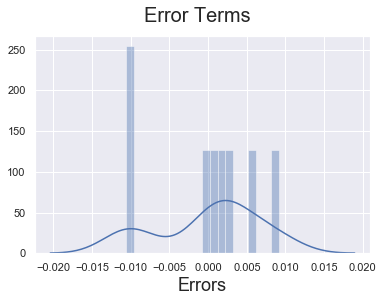

In [29]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_raid), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 6: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time we go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [30]:
num_vars = ['MATCHES PLAYED','WINS','DRAWS','LOSSES','AVG RANKING','TOTAL RAIDS','SUCCESSFUL RAIDS','UNSUCCESSFUL RAID','EMPTY RAIDS',
'NO. OF SUPER RAIDS','RAID TOUCH POINTS','RAID BONUS POINTS','TOTAL RAID POINTS','TOTAL TACKLES','SUCCESSFUL TACKLES','UNSUCCESFUL TACKLES',
'NO. OF SUPER TACKLES','ALL OUTS INFLICTED','TOTAL ALL OUT POINTS','TOTAL DEFENCE POINTS']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [31]:
df_test

,MATCHES PLAYED,WINS,DRAWS,LOSSES,AVG RANKING,TOTAL RAIDS,SUCCESSFUL RAIDS,UNSUCCESSFUL RAID,EMPTY RAIDS,SUCCESS RAID %,NO. OF SUPER RAIDS,RAID TOUCH POINTS,RAID BONUS POINTS,TOTAL RAID POINTS,TOTAL TACKLES,SUCCESSFUL TACKLES,UNSUCCESFUL TACKLES,SUCCESSFUL TACKLE %,NO. OF SUPER TACKLES,ALL OUTS INFLICTED,TOTAL ALL OUT POINTS,TOTAL DEFENCE POINTS,ALL OUTS CONCEEDED,WINS%,DRAWS%,LOSSES%,AVG SUCCESSFUL TACKLES,AVG SUCCESSFUL RAIDS,AVG ALL OUTS INFLICTED,AVG ALL OUTS CONCEEDED,SuperPerformance
9,0.0000,0.5833,0.5000,0.3000,0.2911,0.1413,-0.3529,0.3115,0.8250,0.3800,0.0909,-0.1759,0.1042,-0.2650,0.0147,0.4643,0.0714,0.4600,0.3333,0.3810,0.3810,0.4286,22.0000,0.5556,0.1111,0.3333,9.8333,12.3889,1.1667,1.2222,20.0000
6,0.5000,0.5833,0.0000,0.5000,0.1899,0.2935,-0.0098,0.2623,0.6000,0.4200,0.2727,0.1667,0.0833,0.0427,-0.0956,0.3036,0.0179,0.4600,0.4167,0.6190,0.6190,0.3000,21.0000,0.5263,0.0526,0.4211,8.8421,13.5789,1.3684,1.1053,30.0000
1,0.5000,0.2500,0.0000,0.9000,0.4430,0.6304,0.3137,0.4098,0.4625,0.4600,0.8182,0.5556,0.1042,0.4103,0.2574,0.3036,0.4464,0.4300,0.6250,0.7143,0.7143,0.4143,23.0000,0.3158,0.0526,0.6316,8.8421,15.3158,1.4737,1.2105,41.0000
5,0.5000,0.5833,0.0000,0.5000,0.1899,0.5435,0.4902,0.8852,-0.2250,0.4900,0.3636,0.5278,0.6875,0.6239,0.1838,0.3036,0.3571,0.4400,0.7083,0.3810,0.3810,0.4143,24.0000,0.5263,0.0526,0.4211,8.8421,16.2632,1.1053,1.2632,30.0000


#### Dividing into X_test and y_test

In [32]:
y_test = df_test.pop('SUCCESS RAID %')
X_test = df_test

In [33]:
# Creating X_test_m dataframe by dropping variables from X_test_m

X_test_m = X_test[['AVG RANKING', 'SUCCESSFUL RAIDS', 'EMPTY RAIDS', 'SUCCESSFUL TACKLES']]

In [34]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test_m)
X_test_m.shape

(4, 5)

In [35]:
# Making predictions using the model

y_pred_m = lm.predict(X_test_m)
y_pred_m

9   0.6399
6   0.5831
1   0.4914
5   0.5047
dtype: float64

## Step 7: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

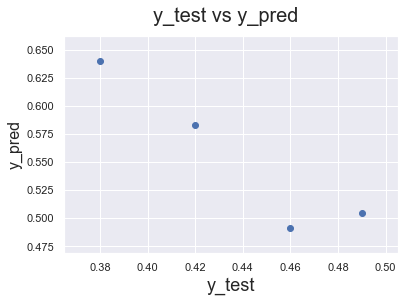

In [36]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

#### Insights:
* Predictor Variables 'AVG RANKING', 'SUCCESSFUL RAIDS', 'EMPTY RAIDS', 'SUCCESSFUL TACKLES'
* Target Variable